<a href="https://colab.research.google.com/github/BI-DS/ELE-3909/blob/master/lecture3/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from scipy.spatial.distance import cdist
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# K-means Algorithm

Let us code a fairly simple k-means algorithm from scratch 🙂

1) generate a simple dataset...

In [10]:
x, y = make_blobs(n_samples=150, centers=3, n_features=2, random_state=800)

let's visualize our dataset, using the true cluster labels

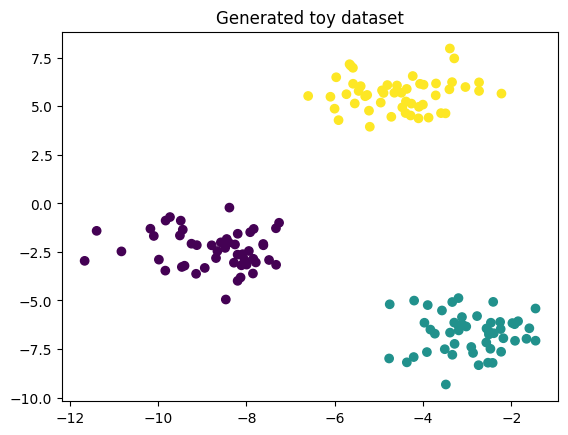

In [16]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.title('Generated toy dataset')
plt.show()

We define the main calculation in a python funtion

In [6]:
def kmeans(x, k=3):
  # create 2 lists to keep track of the:
  # i) centroids and ii) cluster labels
  centroids_history = []
  labels_history = []

  # the first step is to assign the centroids randomly
  rand_idx = np.random.choice(x.shape[0], k)
  centroids = x[rand_idx]

  # keep track of resutls
  centroids_history.append(centroids)

  # lets iterate until we meet the stopping criteria
  while True:
    # calculate distance between all vectors and centroids
    euclidean_dist = cdist(x, centroids)

    # group vectors according with closest centroid
    labels = np.argmin(euclidean_dist, axis=1)

    # keep track of results
    labels_history.append(labels)

    # calculate new centroids based on previous cluster assignment
    # Note:
    # i= x[labels==i] filters vectors for one cluster at a time
    # ii) mean(axis=0) calculate averages for each dimension
    new_centroids = np.array([x[labels==i].mean(axis=0) for i in range(k)])

    # keep track of results
    centroids_history.append(new_centroids)

    # stopping criteria
    # break while loop when the new centroids don't change
    # meaning that the cluster asigment doesn't change
    if np.all(centroids==new_centroids):
      break
    centroids = new_centroids

  # return main results
  return centroids, labels, centroids_history, labels_history


Now that we have coded all steps in the K-means algorithm, let's find 3 clusters in the data that we have just generated!

In [11]:
centers, labels, centers_hist, labels_hist = kmeans(x)

Now we can zip the *history* lists and plot the centroids and cluster labels as our k-means algorithm progressed!  

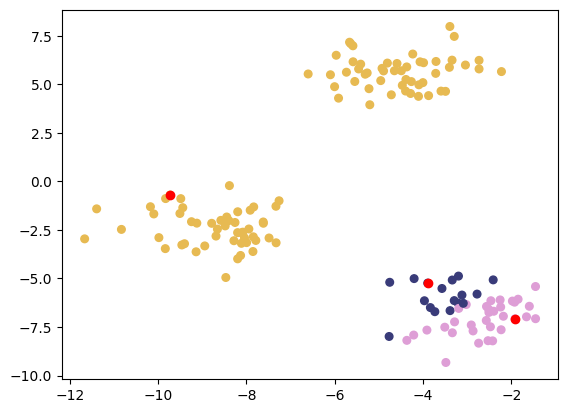

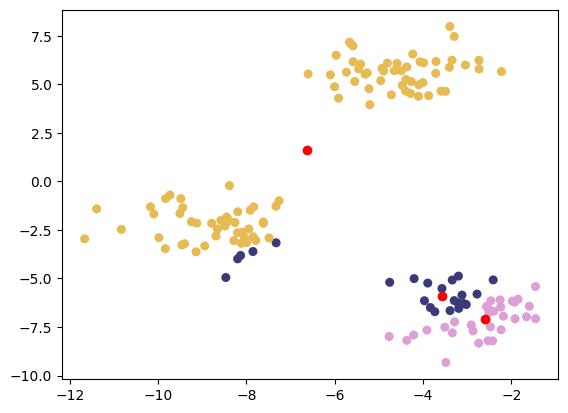

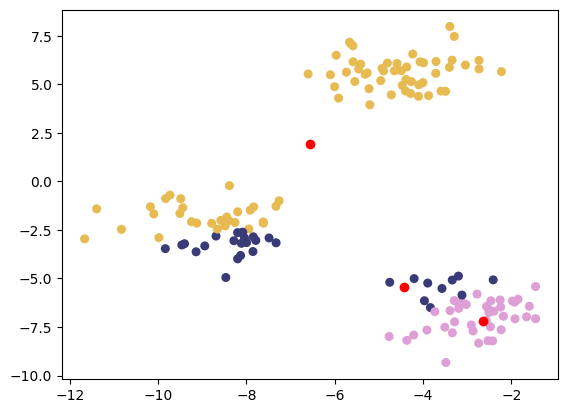

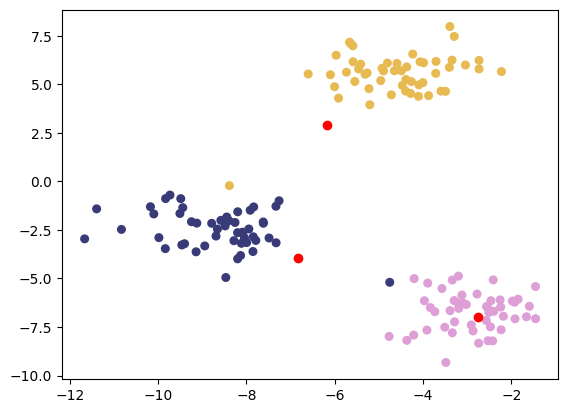

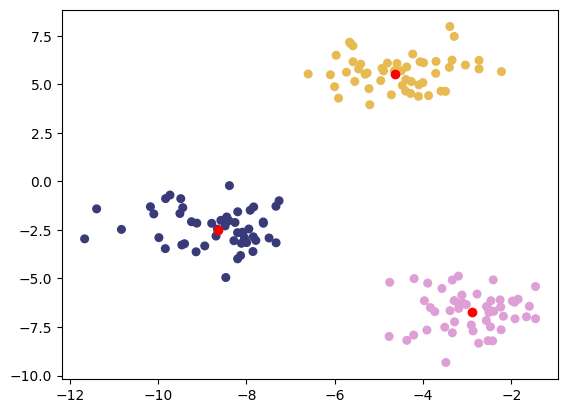

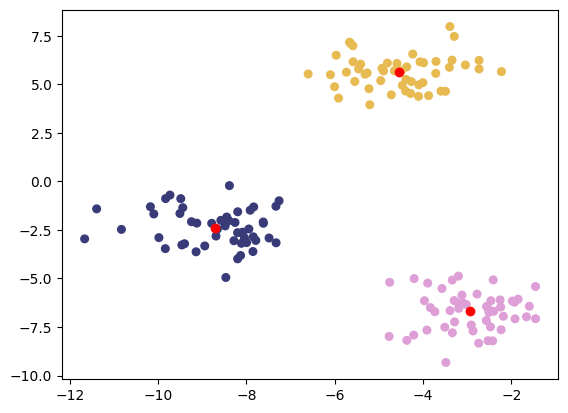

In [13]:
for c, l in zip(centers_hist,labels_hist):
  plt.scatter(x[:,0],x[:,1],c=l, s=30,cmap='tab20b')
  plt.scatter(c[:,0],c[:,1],c='red')
  plt.show()